# Part 1 Diamonds

In [2]:
# Task1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:
# Task2
df = pd.read_csv('diamond.csv')
print("Dataset loaded successfully.")
print("\n-------DATASET OVERVIEW-------")
print(df.info())
print("\n-------DATASET DESCRIPTION-------")
print(df.describe(include='all'))
print("\n-------MISSING VALUES-------")
print(df.isnull().sum())

Dataset loaded successfully.

-------DATASET OVERVIEW-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           53563 non-null  object 
 1   carat                                52430 non-null  object 
 2   cut                                  52647 non-null  object 
 3   color                                52428 non-null  object 
 4   clarity                              53587 non-null  object 
 5   average us salary                    53940 non-null  int64  
 6   number of diamonds mined (millions)  53940 non-null  float64
 7   depth                                53246 non-null  object 
 8   table                                52398 non-null  object 
 9   price                                52357 non-null  object 
 10  x                                

In [4]:
df.rename(columns={"Unnamed: 0": "sno"}, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   sno                                  53563 non-null  object 
 1   carat                                52430 non-null  object 
 2   cut                                  52647 non-null  object 
 3   color                                52428 non-null  object 
 4   clarity                              53587 non-null  object 
 5   average us salary                    53940 non-null  int64  
 6   number of diamonds mined (millions)  53940 non-null  float64
 7   depth                                53246 non-null  object 
 8   table                                52398 non-null  object 
 9   price                                52357 non-null  object 
 10  x                                    52414 non-null  object 
 11  y                           

In [6]:
# Task 3
numeric_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')


for column in numeric_columns:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)


unexpected_entries = ["true", "false", "maybe"]
for column in df.columns:
    df[column] = df[column].apply(lambda x: np.nan if str(x).lower() in unexpected_entries else x)

df.dropna(inplace=True)

In [7]:
# handling unexpected entries
unique_values_summary = {}
for column in df.columns:
    unique_values = df[column].unique()
    unique_values_summary[column] = unique_values
    print(f"Column '{column}' has {len(unique_values)} unique values:")
    print(unique_values)
    print("\n" + "-"*50 + "\n")

Column 'sno' has 49266 unique values:
['1' '2' '3' ... '53938' '53939' '53940']

--------------------------------------------------

Column 'carat' has 273 unique values:
[0.23 0.21 0.29 0.31 0.24 0.22 0.3  0.2  0.32 0.26 0.33 0.25 0.35 0.42
 0.28 0.38 0.7  0.86 0.71 0.78 0.8  0.75 0.74 0.81 0.59 0.9  0.73 0.91
 0.61 0.77 0.76 0.64 0.72 0.79 0.58 1.17 0.6  0.83 0.54 0.98 0.52 0.53
 0.51 1.01 1.05 0.55 0.63 0.87 1.   0.57 0.82 0.96 1.04 0.93 1.2  0.99
 0.34 0.43 0.36 0.84 0.89 1.02 0.56 0.85 0.92 0.95 1.27 0.66 1.12 0.68
 1.03 0.97 0.62 1.22 1.08 0.88 0.5  1.19 0.39 0.65 1.24 1.5  0.27 0.41
 1.13 1.06 0.69 0.4  1.14 0.94 1.29 1.52 1.16 1.21 1.23 1.09 0.67 1.11
 1.1  1.15 1.25 1.18 1.07 1.28 1.51 0.37 1.31 1.26 1.39 1.44 1.35 1.3
 1.41 1.36 1.32 1.45 1.58 1.54 1.34 1.38 1.33 1.74 1.47 1.95 2.   1.37
 1.83 1.62 1.57 1.69 2.06 1.72 1.66 2.14 1.49 1.46 2.15 1.96 2.22 1.7
 1.64 1.53 1.85 2.01 1.4  2.27 1.56 1.81 1.68 1.55 1.82 2.03 1.73 1.59
 1.42 1.43 2.08 1.48 1.6  2.49 2.02 2.07 2.21 2.1 

In [8]:
# Task4
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = df[column].str.lower()

In [9]:
# Task 5
z_threshold = 3
for column in numeric_columns:

    col_mean = df[column].mean()
    col_std = df[column].std()

    z_scores = (df[column] - col_mean) / col_std

    df[column] = np.where(np.abs(z_scores) > z_threshold, df[column].median(), df[column])


In [10]:
df.info()
print("\n-------MISSING VALUES-------")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 49266 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   sno                                  49266 non-null  object 
 1   carat                                49266 non-null  float64
 2   cut                                  49266 non-null  object 
 3   color                                49266 non-null  object 
 4   clarity                              49266 non-null  object 
 5   average us salary                    49266 non-null  int64  
 6   number of diamonds mined (millions)  49266 non-null  float64
 7   depth                                49266 non-null  float64
 8   table                                49266 non-null  float64
 9   price                                49266 non-null  float64
 10  x                                    49266 non-null  float64
 11  y                                

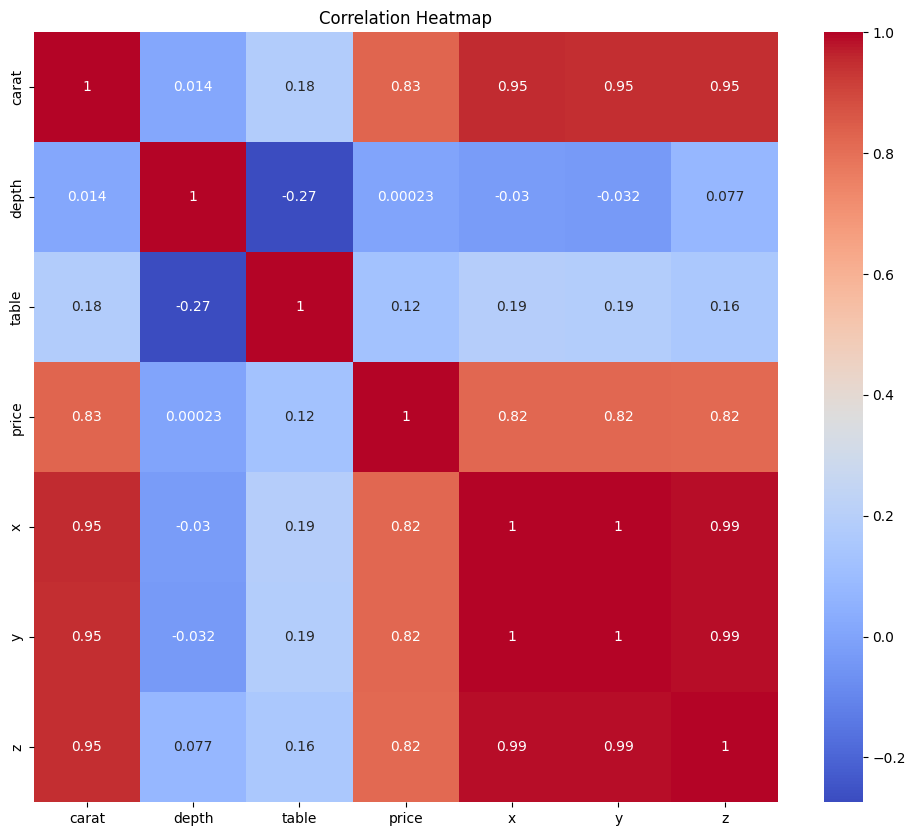

In [11]:
# Task6
# Graph 1 - Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

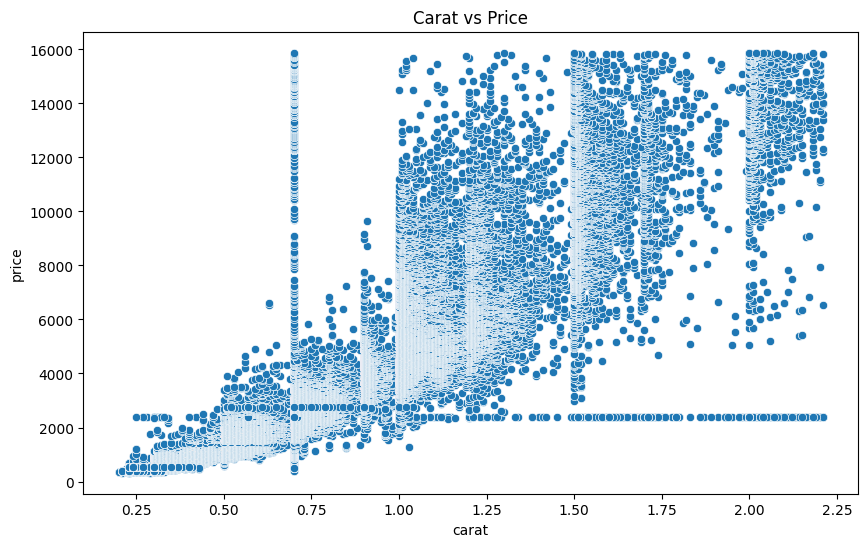

In [12]:
# Graph 2 - Scatter plot of carat vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', data=df)
plt.title('Carat vs Price')
plt.show()

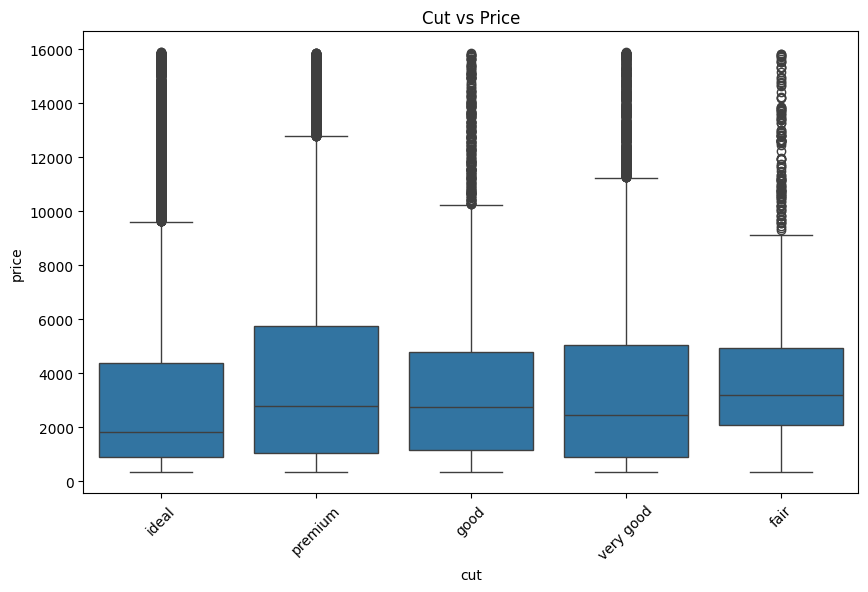

In [13]:
# Graph 3 - Box plot of cut vs price
plt.figure(figsize=(10, 6))
sns.boxplot(x='cut', y='price', data=df)
plt.title('Cut vs Price')
plt.xticks(rotation=45)
plt.show()

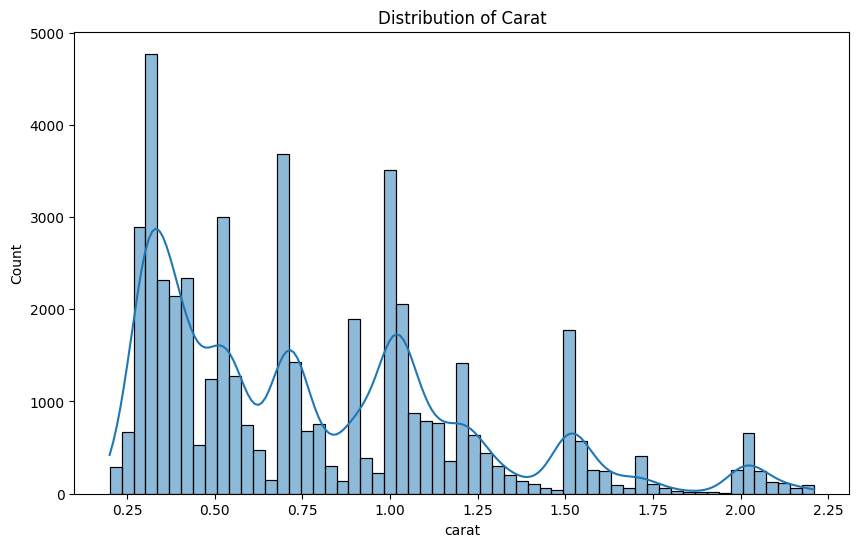

In [14]:
# Graph 4 - Histogram of carat distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['carat'], kde=True)
plt.title('Distribution of Carat')
plt.show()

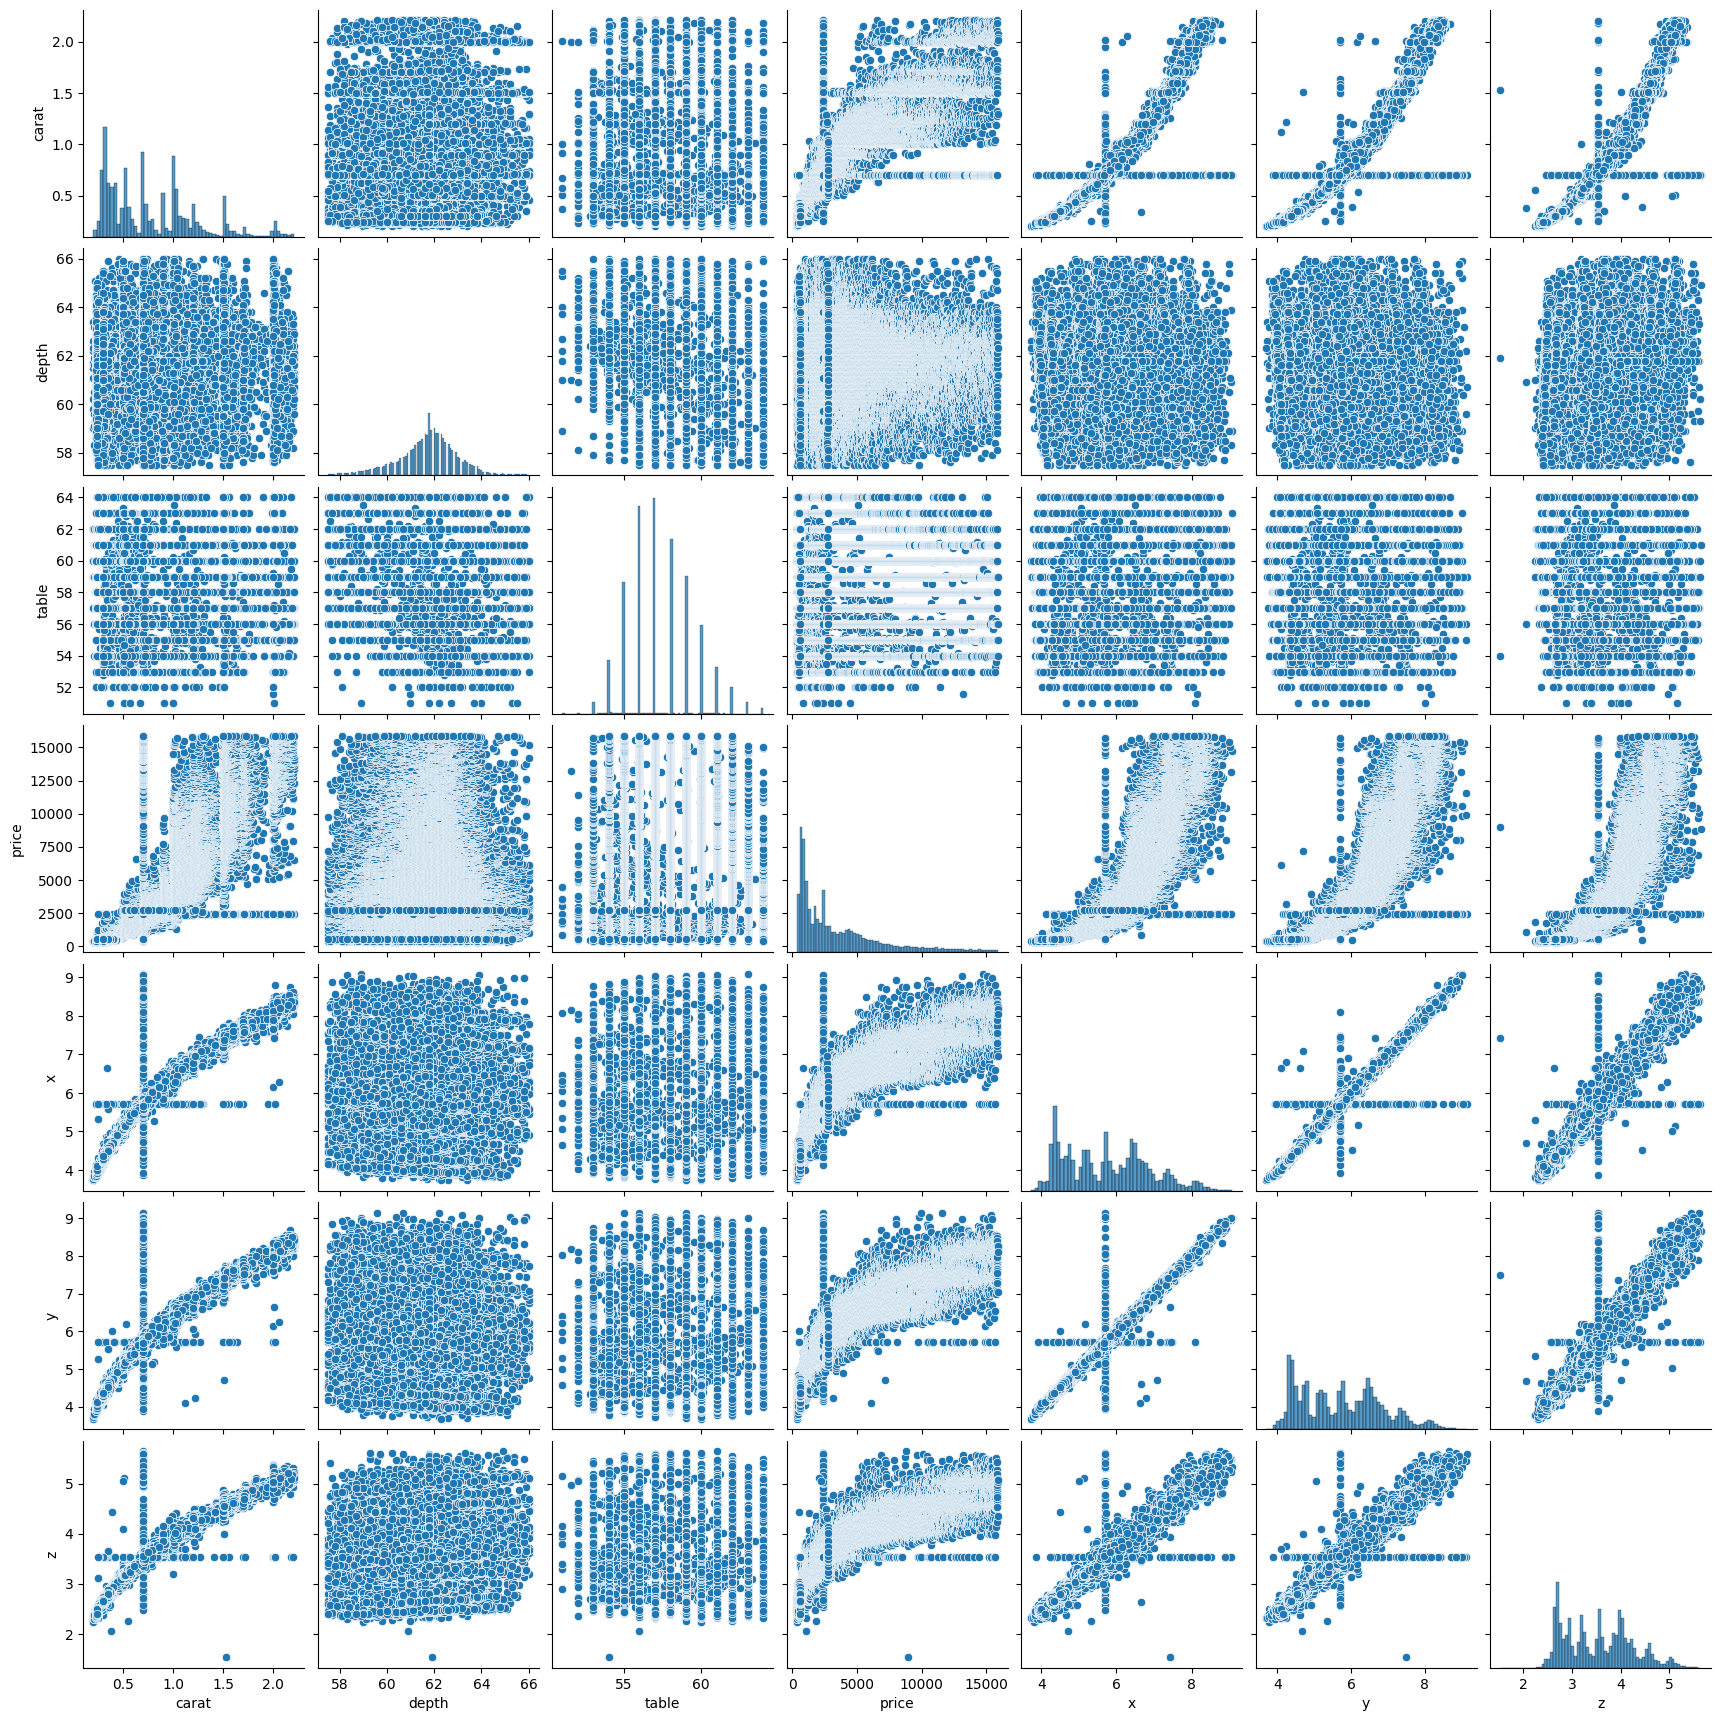

In [15]:
# Graph 5 - Pair plot of numeric features
sns.pairplot(df[numeric_columns])
plt.show()

In [16]:
# label encoding
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = df[column].astype('category').cat.codes

In [17]:
# "Unnamed: 0" to "sno" for clarity
df.rename(columns={"Unnamed: 0": "sno"}, inplace=True)
correlation_with_price = df.corr()['price'].drop('price')
threshold = 0.1
uncorrelated_with_price = correlation_with_price[correlation_with_price.abs() < threshold].index.tolist()

final_columns_to_drop = [
    col for col in uncorrelated_with_price
    if "average" in col or "mined" in col or col == "depth"
]
df.drop(columns=final_columns_to_drop, inplace=True)
print("Columns dropped due to low correlation with price:", final_columns_to_drop)


Columns dropped due to low correlation with price: ['average us salary', 'number of diamonds mined (millions)', 'depth']


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49266 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sno      49266 non-null  int32  
 1   carat    49266 non-null  float64
 2   cut      49266 non-null  int8   
 3   color    49266 non-null  int8   
 4   clarity  49266 non-null  int8   
 5   table    49266 non-null  float64
 6   price    49266 non-null  float64
 7   x        49266 non-null  float64
 8   y        49266 non-null  float64
 9   z        49266 non-null  float64
dtypes: float64(6), int32(1), int8(3)
memory usage: 3.0 MB


In [19]:
# Task 9
numeric_columns_for_normalization = df.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns_for_normalization:
    min_value = df[column].min()
    max_value = df[column].max()
    df[column] = (df[column] - min_value) / (max_value - min_value)

# Convert 'sno' to an integer type to ensure all columns are numeric
df['sno'] = pd.to_numeric(df['sno'], errors='coerce').fillna(0).astype(int)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49266 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sno      49266 non-null  int64  
 1   carat    49266 non-null  float64
 2   cut      49266 non-null  int8   
 3   color    49266 non-null  int8   
 4   clarity  49266 non-null  int8   
 5   table    49266 non-null  float64
 6   price    49266 non-null  float64
 7   x        49266 non-null  float64
 8   y        49266 non-null  float64
 9   z        49266 non-null  float64
dtypes: float64(6), int64(1), int8(3)
memory usage: 3.1 MB


In [21]:
# Final Check
print(df.head())
df.to_csv('Diamonds_preprocessed.csv', index=False)

     sno     carat  cut  color  clarity     table     price         x  \
0      0  0.014925    2      1        3  0.307692  0.000000  0.041121   
1  10174  0.004975    3      1        2  0.769231  0.000000  0.029907   
2  20295  0.014925    1      1        4  0.461538  0.000064  0.059813   
3  30432  0.044776    3      5        5  0.538462  0.000514  0.087850   
4  40615  0.054726    1      6        3  0.538462  0.000579  0.114019   

          y         z  
0  0.054945  0.218447  
1  0.029304  0.189320  
2  0.071429  0.189320  
3  0.100733  0.266990  
4  0.122711  0.296117  
